Let's demo the bias-variance issue discussed in class! We will cook up some synthetic data; in the next homework we will actually test similar ideas on real-world prediction problems.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(1337)

def gen_data(x):
  b = 0.4
  t = np.sin(x) 
  y = t + np.random.uniform(-b,b,len(x))
  return y, t

def get_rand_subsets(len_ratio,x,y,t):
  nsamples = int(np.round(len(x)*len_ratio))
  ind = random.sample(range(len(x)),nsamples)
  ind = np.sort(ind)
  x_subset = x[ind]
  t_subset = t[ind]
  y_subset = y[ind]
  return x_subset, y_subset, t_subset

OK! Let's generate some noisy sinusoidal data, and try to fit various polynomials.

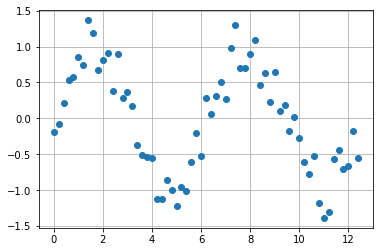

In [16]:
x = np.arange(0,4*np.pi,0.2)
y_orig, t_orig = gen_data(x)

plt.plot(x,y_orig,'o')
plt.grid()

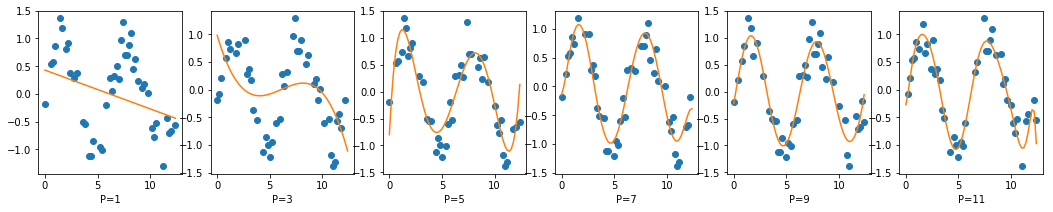

In [21]:
p_order = [1,3,5,7,9,11]
num_trials = 200

f, ax = plt.subplots(1, len(p_order), figsize=(18, 3))
P=[]
biases=[]
variances=[]
for i, p_val in enumerate(p_order):
    y_pred = np.zeros(len(x))
    var = np.zeros(len(x))
    for j in range(num_trials):
        x_sub, y, t_sub = get_rand_subsets(0.7, x, y_orig, t_orig)
        p = np.poly1d(np.polyfit(x_sub, y, p_val))
        P.append(p)
        y_pred = y_pred + p(x)

    y_pred = y_pred/num_trials
    ax[i].plot(x_sub, y, 'o', x, y_pred, '-')
    ax[i].set_xlabel('P='+str(p_order[i]))
    bias = np.linalg.norm(y_pred-t_orig)
    biases.append(bias)

    for j in range(num_trials):
        p_t = P.pop(0)
        var = var + np.square(p_t(x)-y_pred)
    var = var/num_trials
    variance = np.linalg.norm(var)
    variances.append(variance)


OK, how about the bias and variance?

In [22]:
print("bias: ", biases)
print("var: ",variances)


bias:  [5.169333647432661, 4.753437143736304, 1.8183377674167815, 0.592992834186777, 0.5105043872534251, 1.108218892725017]
var:  [0.04400847095350286, 0.1950393889301495, 0.1677169806489082, 0.11257056156681226, 1.0991990738872162, 2.2755641979943078]


Seems to be working! Note that with higher model order, the fit (bias) is better but the variance is high across different trials. Let's plot the bias-variance curve.

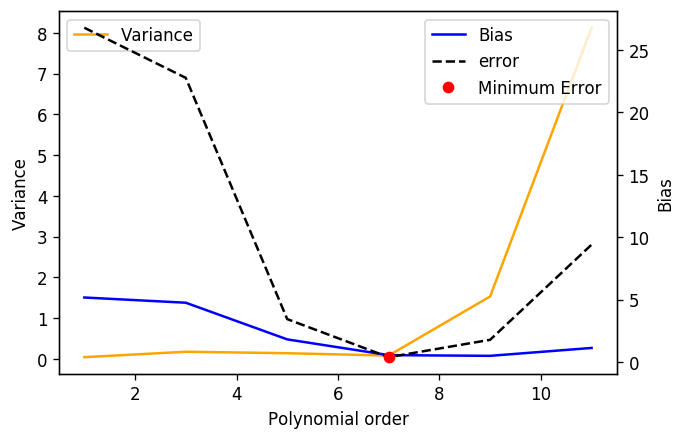

In [72]:

fig, ax1 = plt.subplots(dpi=120)

ax1.set_xlabel('Polynomial order')
ax1.set_ylabel('Variance')
ax1.plot(p_order,variances,color='orange',label = 'Variance')

ax2 = ax1.twinx()

ax2.set_ylabel('Bias')
ax2.plot(p_order, biases,color='blue',label = 'Bias')

error = np.square(biases)+variances
min_ind = np.argmin(error)
plt.plot(p_order, error, 'k--', label = 'error')
plt.plot(p_order[min_ind], error[min_ind], 'ro', label= 'Minimum Error')
leg = ax2.legend(loc='upper right')
leg = ax1.legend(loc='upper left')
plt.show()